In [1]:
# importing librarires
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [2]:
#Importamos la base de datos
df = pd.read_csv(r'C:\Users\juanc\Desktop\proyecto ML\proyecto machine learning\3-Machine-Learning\Entregas\ML_project\salaries _2.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16489,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16490,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16491,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16492,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


## **Análisis exploratorio de los datos**

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M


In [4]:
df.info()
#No hay ningun NAN. 
#Para el analisis posterior sera necesario pasar alguna columna de obj a numerica

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16494.000000,1.649400e+04,16494.000000,16494.000000
mean,2023.224991,1.637878e+05,149713.575725,32.044986
std,0.713405,3.406017e+05,68516.136918,46.260201
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.020000e+05,101517.500000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.873422e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


***Eliminamos las columnas que no nos hagan falta***


In [6]:
df = df.drop(columns=['salary_currency', 'salary'])
#la columna salary_currency, salary y salary_in_usd dice lo mismo asi que me quedo unicamente con salary_in_usd

### **Pasamos las columnas de type object a int, antes de esto analizamos cada columna si tiene mas sentido pasarlo a binario o continua**

#### 1. Columna Experiencie_level

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

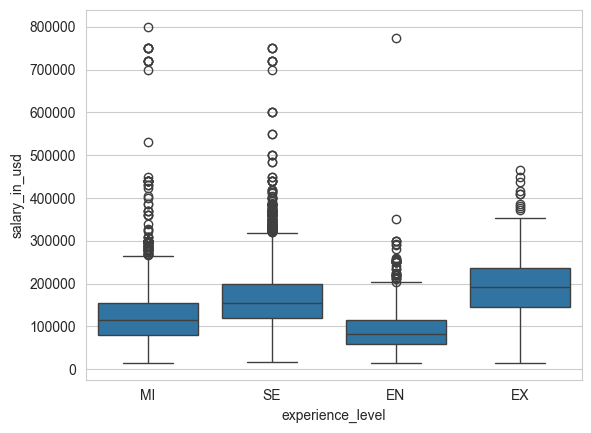

In [7]:
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
#en=entry, mi=middle, se=senior, ex=Executive-level / Director
#vemos que a mayor experiencia mayor sueldo por lo que tiene sentido pasarlo a una variable continua

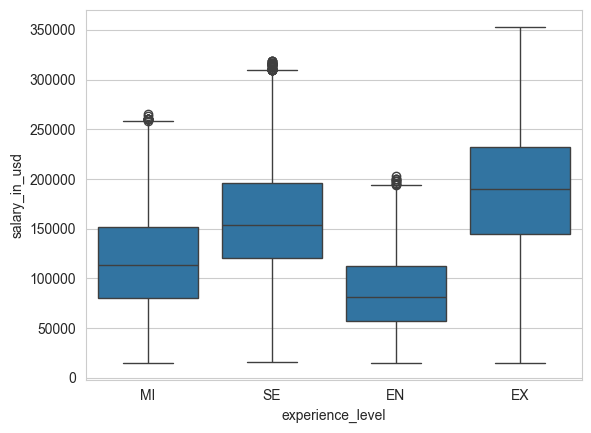

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que df es tu DataFrame y 'salary_in_usd' es la columna de interés

# Calcular el primer y tercer cuartil (Q1 y Q3) para cada nivel de experiencia
Q1 = df.groupby('experience_level')['salary_in_usd'].quantile(0.25)
Q3 = df.groupby('experience_level')['salary_in_usd'].quantile(0.75)

# Calcular el rango intercuartílico (IQR) para cada nivel de experiencia
IQR = Q3 - Q1

# Calcular los límites inferior y superior para identificar outliers para cada nivel de experiencia
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aplicar la máscara para eliminar los valores atípicos directamente sobre df
mask = df.apply(lambda row: lower_bound[row['experience_level']] <= row['salary_in_usd'] <= upper_bound[row['experience_level']], axis=1)
df = df[mask]

# Crear el boxplot sin valores atípicos
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.show()


In [9]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,US,0,US,M


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16169 entries, 0 to 16493
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16169 non-null  int64 
 1   experience_level    16169 non-null  object
 2   employment_type     16169 non-null  object
 3   job_title           16169 non-null  object
 4   salary_in_usd       16169 non-null  int64 
 5   employee_residence  16169 non-null  object
 6   remote_ratio        16169 non-null  int64 
 7   company_location    16169 non-null  object
 8   company_size        16169 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.2+ MB


In [13]:
# Pasar la columna de str a int
df['experience_level'] = df['experience_level'].replace({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})

C:\Users\juanc\AppData\Local\Temp\ipykernel_23040\3770702301.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['experience_level'] = df['experience_level'].replace({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})


#### 2. Columna Company_location

In [14]:
company_location_counts =df['company_location'].value_counts()
# Identificar los paises que aparecen menos de 30 veces
company_location_remove = company_location_counts[company_location_counts < 30].index

# Eliminar las filas correspondientes a estos países, ya que estos son demasiados excasos para ser representativos
df = df[~df['company_location'].isin(company_location_remove)]
#solo nos quedamos las que almenos sean 30
#us esta sobrepresentado hay que disminuirlo
company_location_counts

company_location
US    14173
GB      686
CA      451
ES      133
DE      104
      ...  
MU        1
AM        1
AD        1
EC        1
MD        1
Name: count, Length: 76, dtype: int64

In [15]:
# Selecciona todas las filas de la clase "US"
us_rows = df[df['company_location'] == 'US']

# Si hay más de 2000 filas de la clase "US", submuestrea aleatoriamente 2000 filas
if len(us_rows) > 2000:
    us_sampled_rows = us_rows.sample(n=2000, random_state=42)
else:
    us_sampled_rows = us_rows

# Selecciona todas las filas que no son de la clase "US"
non_us_rows = df[df['company_location'] != 'US']

# Combina las filas submuestreadas de la clase "US" con las filas que no son de la clase "US"
df = pd.concat([us_sampled_rows, non_us_rows])


In [21]:
df.groupby('company_location').mean('salary_in_usd')
#vemos que paises tienen un salario medio similar para agruparlos a la hora de pasarlo a numerico para meterlo en los modelos


,work_year,experience_level,salary_in_usd,remote_ratio
company_location,,,,
AU,2023.240741,2.000000,118697.037037,25.925926
CA,2023.289888,2.653933,141094.993258,39.775281
DE,2022.471910,2.022472,74940.000000,49.438202
ES,2022.626016,2.609756,48898.772358,32.113821
FR,2022.363636,1.981818,67152.709091,60.909091
GB,2023.100156,2.256651,80731.269171,29.264476
IN,2022.285714,2.053571,33412.714286,70.535714
NL,2022.812500,2.031250,75759.937500,51.562500
US,2023.253663,2.638706,149363.518949,31.556342


<Axes: xlabel='company_location', ylabel='salary_in_usd'>

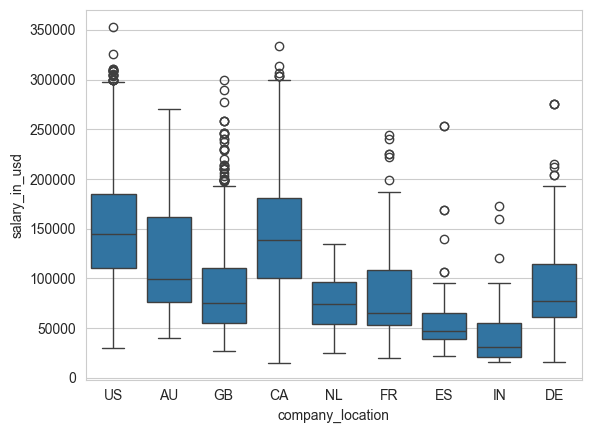

In [18]:
sns.boxplot(x='company_location', y='salary_in_usd', data=df)

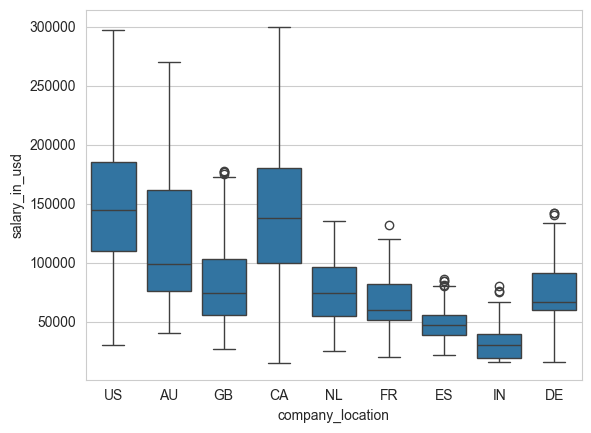

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que df es tu DataFrame y 'salary_in_usd' es la columna de interés

# Calcular el primer y tercer cuartil (Q1 y Q3) para cada ubicación de la empresa
Q1 = df.groupby('company_location')['salary_in_usd'].quantile(0.25)
Q3 = df.groupby('company_location')['salary_in_usd'].quantile(0.75)

# Calcular el rango intercuartílico (IQR) para cada ubicación de la empresa
IQR = Q3 - Q1

# Calcular los límites inferior y superior para identificar outliers para cada ubicación de la empresa
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aplicar la máscara para eliminar los valores atípicos directamente sobre df
mask = df.apply(lambda row: lower_bound[row['company_location']] <= row['salary_in_usd'] <= upper_bound[row['company_location']], axis=1)
df = df[mask]

# Crear el boxplot sin valores atípicos
sns.boxplot(x='company_location', y='salary_in_usd', data=df)
plt.show()


In [22]:
# Crear un diccionario de mapeo
location_mapping = {
    'ES': 1,
    'IN': 1,
    'DE': 2,
    'FR': 2,
    'NL': 2,
    'GB': 2,
    'US': 4,
    'AU': 3,
    'CA': 4
}

# Crear la nueva columna 'riqueza_paises' usando el diccionario de mapeo
df['company_location'] = df['company_location'].map(location_mapping)
df



,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2641,2024,1,FT,Data Engineer,115000,US,100,4,M
10352,2023,3,FT,Machine Learning Engineer,226600,US,0,4,M
5948,2024,2,FT,Research Scientist,81500,US,100,4,M
3671,2024,2,FT,Data Scientist,140400,US,100,4,M
14970,2022,2,FT,Data Engineer,120000,US,0,4,M
...,...,...,...,...,...,...,...,...,...
16457,2021,3,FT,Data Engineer,76833,RO,50,2,S
16467,2020,2,FT,Data Scientist,38776,ES,100,1,M
16468,2021,2,FT,Data Scientist,46809,ES,100,1,M
16474,2021,2,FT,Lead Data Analyst,19609,IN,100,1,L


#### 3. Columna Employment_type

<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

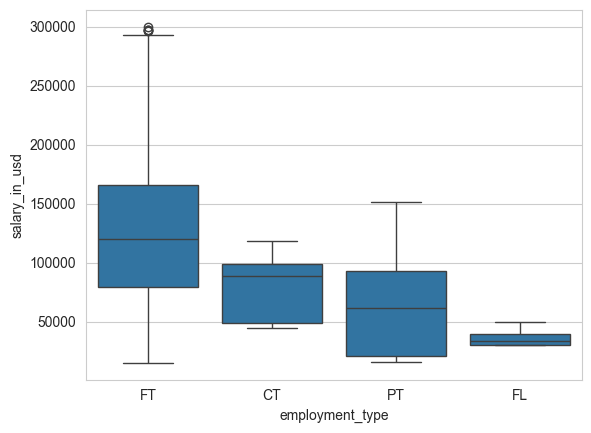

In [23]:
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
#FL=freelance, pt=part time, ct=contrato por proyecto, ft=fulltime

In [24]:
df['employment_type'].value_counts()
#Elimino todos los que no sean FT del resto hay muy pocos datos

employment_type
FT    3451
PT      10
CT       7
FL       4
Name: count, dtype: int64

In [25]:
# Especificar los valores a eliminar
employment_type_remove = ['PT', 'CT', 'FL']

# Eliminar las filas que tienen esos valores en la columna 'employment_type'
df = df.drop(df[df['employment_type'].isin(employment_type_remove)].index)

#Como solo me queda FT en la columna esta ya no me aporta informacion alguna y podemos eliminarla
df = df.drop(columns=['employment_type'])


#### 4. Columna Job_title

In [26]:
job_title_counts = df['job_title'].value_counts()
#Considero que todos los trabajos en los que tenga menos de 50 personas no hay data suficiente y el resultado puede estar muy sesgado por el azar por lo que los elimino

In [27]:
# Identificar los trabajos que aparecen menos de 50 veces
job_title_remove = job_title_counts[job_title_counts < 50].index

# Eliminar las filas correspondientes a estos países, ya que estos son demasiados excasos para ser representativos
df = df[~df['job_title'].isin(job_title_remove)]

In [28]:
df['job_title'].value_counts()
#las que tienen 50-100 counts no las eliminamos porque vemos que muchas son puestos de manager/jefe por lo que tiene sentido que haya menos pero esa informacion nos es relevante mantenerla

job_title
Data Scientist                   783
Data Engineer                    694
Data Analyst                     528
Machine Learning Engineer        339
Analytics Engineer               104
Data Architect                    86
Research Scientist                72
Applied Scientist                 57
Business Intelligence Analyst     50
Name: count, dtype: int64

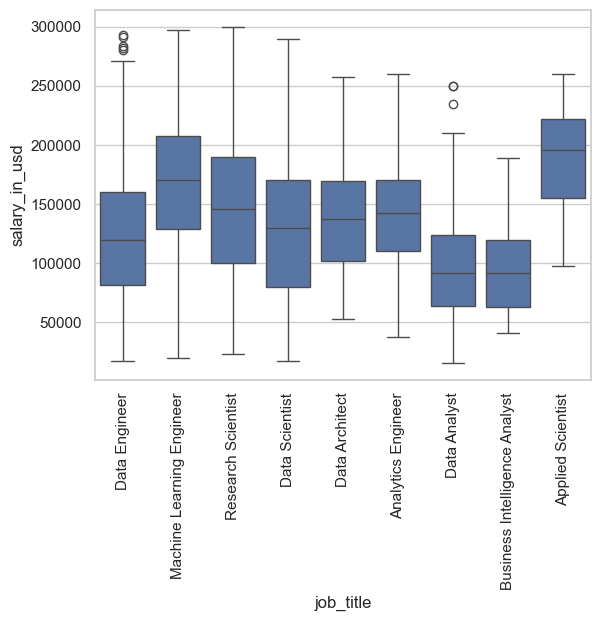

In [29]:
# Establece el estilo de Seaborn
sns.set(style="whitegrid")

# Crea el gráfico de caja
sns.boxplot(x='job_title', y='salary_in_usd', data=df)

# Rota los nombres del eje x en vertical
plt.xticks(rotation=90)

# Muestra el gráfico
plt.show()



In [30]:
df.groupby('job_title').mean('salary_in_usd')

,work_year,experience_level,salary_in_usd,remote_ratio,company_location
job_title,,,,,
Analytics Engineer,2023.221154,2.750000,142149.615385,50.000000,3.461538
Applied Scientist,2023.175439,2.701754,193121.421053,26.315789,4.000000
Business Intelligence Analyst,2023.540000,2.220000,94554.780000,27.000000,3.400000
Data Analyst,2023.181818,2.238636,95949.369318,32.859848,3.287879
Data Architect,2023.453488,2.953488,138994.837209,39.534884,3.511628
Data Engineer,2023.082133,2.557637,124898.629683,36.959654,3.321326
Data Scientist,2023.063857,2.549170,128500.927203,31.353768,3.312899
Machine Learning Engineer,2023.179941,2.734513,166418.805310,31.858407,3.622419
Research Scientist,2023.055556,2.569444,149030.833333,29.166667,3.708333


In [31]:
df = pd.get_dummies(df, columns=['job_title'])
#creamos de variables dummy


#### 5. Columna Employee_residence

In [36]:
# Cuenta los valores en los que las columnas company_location y employee_residence no coinciden
mismatch_count = (df['company_location'] != df['employee_residence']).sum()
mismatch_count
#casi todo el mundo vive donde trabaja, por lo cual la informacion esta repetida y puedo cargarme una columna

2713

In [37]:
df = df.drop(columns=['employee_residence'])

#### 6. Columna remote_ratio

In [38]:
df['remote_ratio'].value_counts()


remote_ratio
0      1757
100     882
50       74
Name: count, dtype: int64

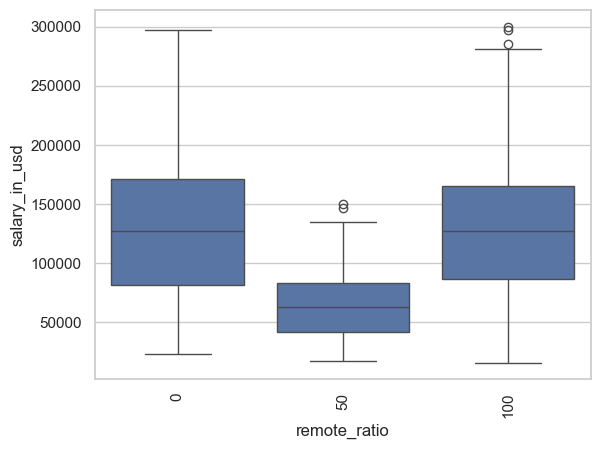

In [39]:
# Establece el estilo de Seaborn
sns.set(style="whitegrid")

# Crea el gráfico de caja
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df)

# Rota los nombres del eje x en vertical
plt.xticks(rotation=90)

# Muestra el gráfico
plt.show()



In [40]:
#no aporta info me la cargo
df = df.drop(columns=['remote_ratio'])

#### 7. Columna Company_size

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

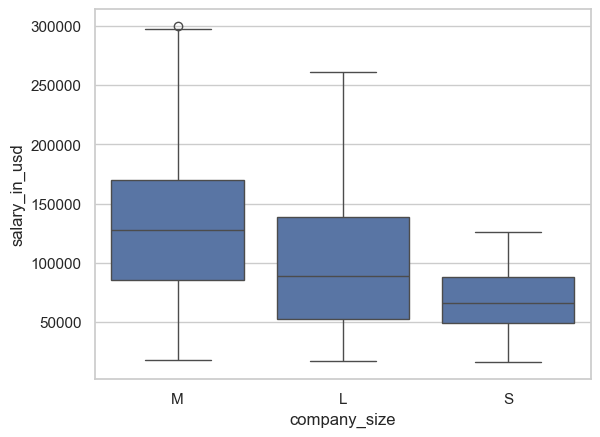

In [41]:
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
#s=small, M=middle, L=large
#vemos que las empresas pequeñas se cobra menos pero entre mediana y grande apenas hay diferencia

In [43]:
df.groupby('company_size').mean('salary_in_usd')

,work_year,experience_level,salary_in_usd,company_location,job_title_Analytics Engineer,job_title_Applied Scientist,job_title_Business Intelligence Analyst,job_title_Data Analyst,job_title_Data Architect,job_title_Data Engineer,job_title_Data Scientist,job_title_Machine Learning Engineer,job_title_Research Scientist
company_size,,,,,,,,,,,,,
L,2022.276316,2.164474,110283.592105,2.901316,0.006579,0.203947,0.006579,0.098684,0.000000,0.197368,0.276316,0.125000,0.085526
M,2023.209192,2.562995,130051.494057,3.430666,0.040808,0.010301,0.019414,0.201268,0.034073,0.261490,0.286450,0.124010,0.022187
S,2021.621622,1.945946,69271.243243,2.432432,0.000000,0.000000,0.000000,0.135135,0.000000,0.108108,0.486486,0.189189,0.081081


In [44]:
# Pasar la columna de str a int
df['company_size'] = df['company_size'].replace({'S': 1, 'M': 2, 'L': 2})

C:\Users\juanc\AppData\Local\Temp\ipykernel_23040\69041577.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['company_size'] = df['company_size'].replace({'S': 1, 'M': 2, 'L': 2})


### **Una vez que hemos limpiado la data vamos a ver la relaciones entre las variables**

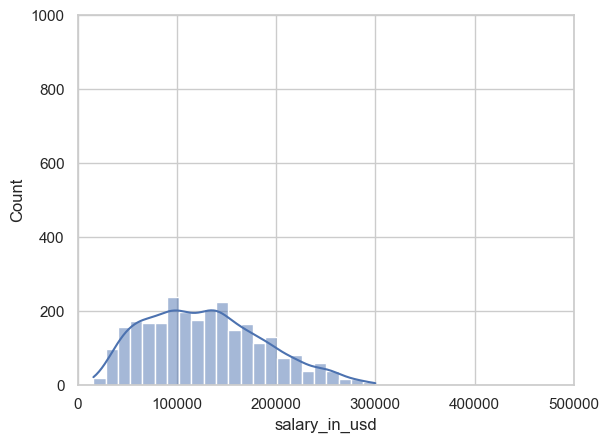

In [45]:
# Crear el histograma con Seaborn
sns.histplot(df['salary_in_usd'], kde=True)

# Ajustar la escala del eje x y el eje y (opcional)
plt.xlim(0, 500000)  # Ajustar los valores según el rango de tus datos
plt.ylim(0, 1000)     # Ajustar los valores según el rango de tus datos

# Mostrar el gráfico
plt.show()

#vemos que la targer salary tiene una distribucion mas o menos normal, por lo que estaria ok para nuestro modelo



<Axes: xlabel='work_year', ylabel='salary_in_usd'>

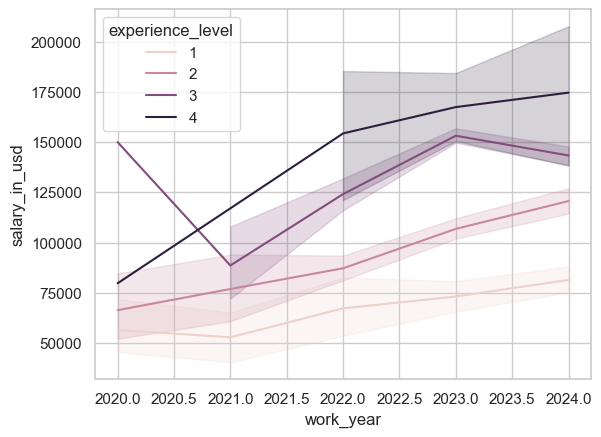

In [46]:
sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='experience_level')
#tendencia alcista en los salarios segun transcurren los años da igual tu nivel de experiencia




In [47]:
df.head()


,work_year,experience_level,salary_in_usd,company_location,company_size,job_title_Analytics Engineer,job_title_Applied Scientist,job_title_Business Intelligence Analyst,job_title_Data Analyst,job_title_Data Architect,job_title_Data Engineer,job_title_Data Scientist,job_title_Machine Learning Engineer,job_title_Research Scientist
2641,2024,1,115000,4,2,False,False,False,False,False,True,False,False,False
10352,2023,3,226600,4,2,False,False,False,False,False,False,False,True,False
5948,2024,2,81500,4,2,False,False,False,False,False,False,False,False,True
3671,2024,2,140400,4,2,False,False,False,False,False,False,True,False,False
14970,2022,2,120000,4,2,False,False,False,False,False,True,False,False,False


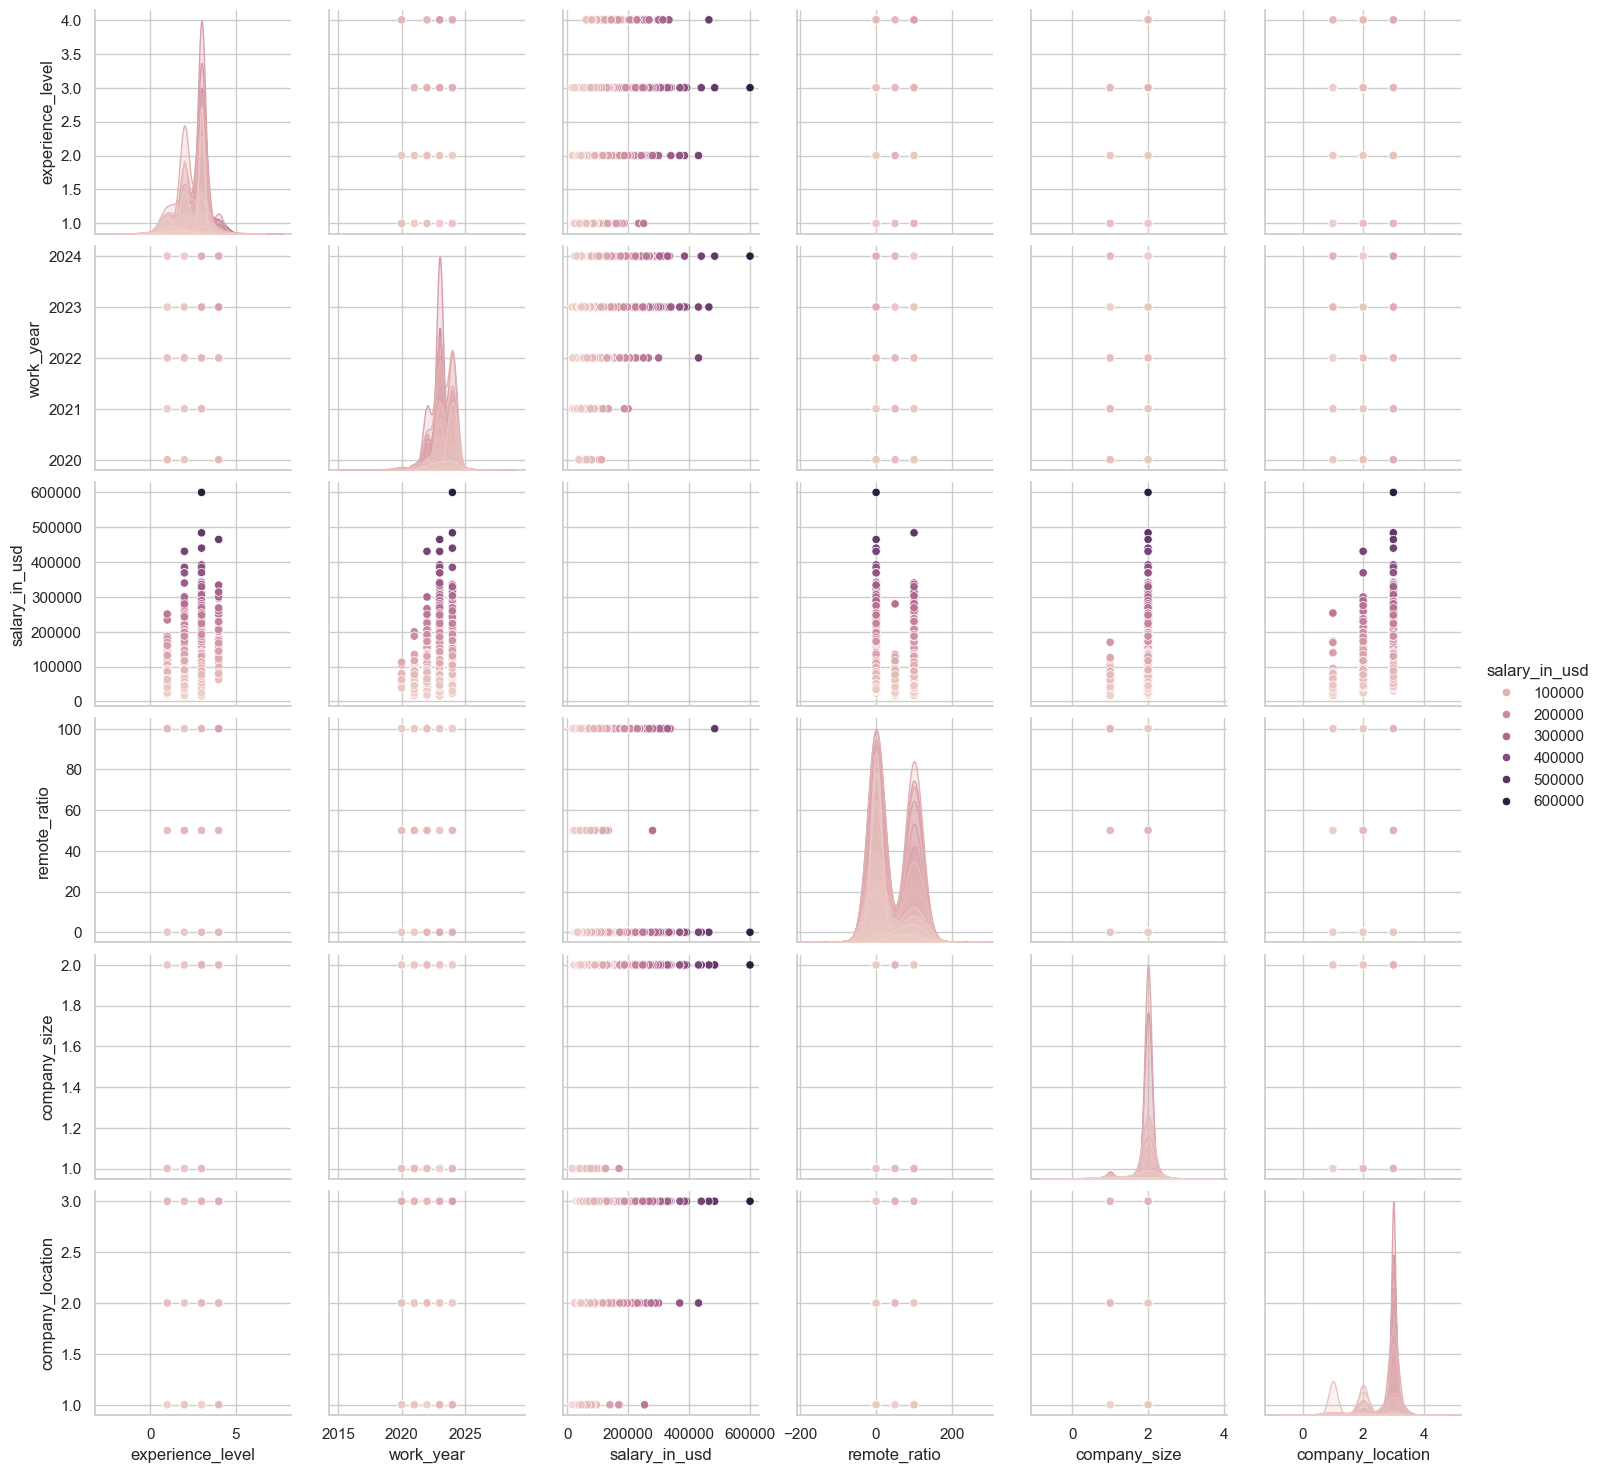

In [36]:
# Especificar las columnas que deseas incluir en el pairplot
columnas_a_incluir = ['experience_level', 'work_year', 'salary_in_usd','remote_ratio','company_size','company_location']

# Crear el pairplot con las columnas seleccionadas
sns.pairplot(df, vars=columnas_a_incluir, hue="salary_in_usd")

# Mostrar el gráfico
plt.show()



<Axes: >

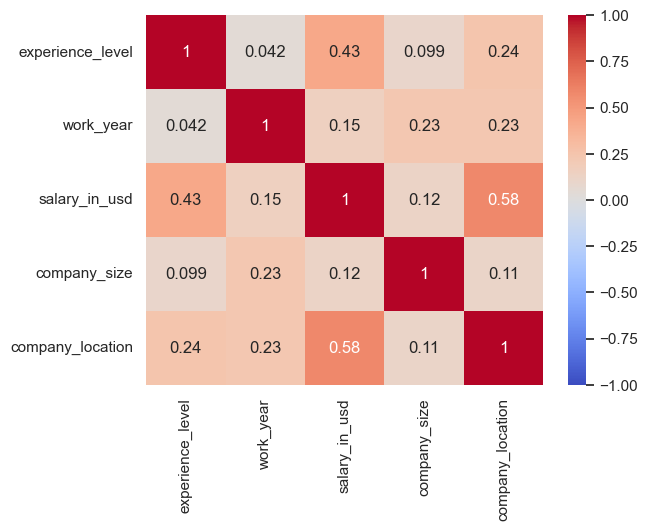

In [48]:
# Especificar las columnas que deseas incluir en la matriz de correlación
columnas_a_incluir = ['experience_level', 'work_year', 'salary_in_usd', 'company_size', 'company_location']

# Filtrar el DataFrame para incluir solo las columnas seleccionadas
df_filtrado = df[columnas_a_incluir]

# Calcular la matriz de correlación
matriz_correlacion = df_filtrado.corr()

# Crear el heatmap con la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

#vemos que apenas hay correlacion lineal entre las variables, solo un poco entre años de experiencia y la ubicacion de la compañia


In [49]:


# Calcula la matriz de correlación entre todas las columnas 
df.corr()



,work_year,experience_level,salary_in_usd,company_location,company_size,job_title_Analytics Engineer,job_title_Applied Scientist,job_title_Business Intelligence Analyst,job_title_Data Analyst,job_title_Data Architect,job_title_Data Engineer,job_title_Data Scientist,job_title_Machine Learning Engineer,job_title_Research Scientist
work_year,1.000000,0.042058,0.149223,0.233257,0.230376,0.022193,0.007616,0.071782,0.029615,0.074523,-0.040328,-0.058879,0.021847,-0.017037
experience_level,0.042058,1.000000,0.427943,0.244760,0.098560,0.062152,0.035499,-0.061168,-0.206343,0.108959,0.021277,0.015405,0.109268,0.008779
salary_in_usd,0.149223,0.427943,1.000000,0.584571,0.117283,0.047496,0.161419,-0.077947,-0.268016,0.033367,-0.031964,0.004166,0.245345,0.058537
company_location,0.233257,0.244760,0.584571,1.000000,0.113237,0.014928,0.090500,0.001742,-0.049332,0.022667,-0.039062,-0.047849,0.089561,0.053438
company_size,0.230376,0.098560,0.117283,0.113237,1.000000,0.023477,0.017226,0.016112,0.017667,0.021275,0.039805,-0.051350,-0.022842,-0.039902
job_title_Analytics Engineer,0.022193,0.062152,0.047496,0.014928,0.023477,1.000000,-0.029248,-0.027358,-0.098146,-0.036124,-0.117055,-0.127169,-0.075447,-0.032966
job_title_Applied Scientist,0.007616,0.035499,0.161419,0.090500,0.017226,-0.029248,1.000000,-0.020073,-0.072014,-0.026506,-0.085888,-0.093309,-0.055358,-0.024188
job_title_Business Intelligence Analyst,0.071782,-0.061168,-0.077947,0.001742,0.016112,-0.027358,-0.020073,1.000000,-0.067358,-0.024792,-0.080336,-0.087277,-0.051780,-0.022625
job_title_Data Analyst,0.029615,-0.206343,-0.268016,-0.049332,0.017667,-0.098146,-0.072014,-0.067358,1.000000,-0.088943,-0.288206,-0.313107,-0.185759,-0.081166
job_title_Data Architect,0.074523,0.108959,0.033367,0.022667,0.021275,-0.036124,-0.026506,-0.024792,-0.088943,1.000000,-0.106079,-0.115245,-0.068372,-0.029875


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2713 entries, 2641 to 16478
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   work_year                                2713 non-null   int64
 1   experience_level                         2713 non-null   int64
 2   salary_in_usd                            2713 non-null   int64
 3   company_location                         2713 non-null   int64
 4   company_size                             2713 non-null   int64
 5   job_title_Analytics Engineer             2713 non-null   bool 
 6   job_title_Applied Scientist              2713 non-null   bool 
 7   job_title_Business Intelligence Analyst  2713 non-null   bool 
 8   job_title_Data Analyst                   2713 non-null   bool 
 9   job_title_Data Architect                 2713 non-null   bool 
 10  job_title_Data Engineer                  2713 non-null   bool 
 11  job_t

In [40]:
!pip install xgboost

In [51]:
import xgboost

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import 
from xgboost import XGBRegressor

SyntaxError: invalid syntax (1346443695.py, line 4)

In [53]:
# Dividir los datos en variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=['salary_in_usd'])
y = df['salary_in_usd']

In [54]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline

### **XGBoost**

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# XGBoost
from xgboost import XGBRegressor

# Crear y ajustar el modelo XGBoost
xgboost_model = XGBRegressor(n_estimators=100, random_state=0)
xgboost_model.fit(X, y)

# Calcular el error absoluto medio en el conjunto de entrenamiento
mae_train = mean_absolute_error(y, xgboost_model.predict(X))
print(f"Mean Absolute Error on Training Set: {mae_train}")

# Calcular el error absoluto medio en porcentaje
mae_train_percentage = (mae_train / y.mean()) * 100
print(f"Mean Absolute Error on Training Set (Percentage): {mae_train_percentage:.2f}%")

# Validación cruzada para evaluar el modelo
xgboost_mae_scores = -cross_val_score(xgboost_model, X, y, cv=10, scoring='neg_mean_absolute_error')
mean_mae_cv = xgboost_mae_scores.mean()
print(f"Mean Absolute Error with Cross Validation: {mean_mae_cv}")

# Calcular el MAE en porcentaje para validación cruzada
mean_mae_cv_percentage = (mean_mae_cv / y.mean()) * 100
print(f"Mean Absolute Error with Cross Validation (Percentage): {mean_mae_cv_percentage:.2f}%")



Mean Absolute Error on Training Set: 29698.239737994725
Mean Absolute Error on Training Set (Percentage): 23.18%
Mean Absolute Error with Cross Validation: 33097.53670433579
Mean Absolute Error with Cross Validation (Percentage): 25.83%


### **RandomForest**

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# Crear y ajustar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X, y)

# Calcular el error absoluto medio en el conjunto de entrenamiento
mae_train_rf = mean_absolute_error(y, rf_model.predict(X))
print(f"Mean Absolute Error on Training Set (Random Forest): {mae_train_rf}")

# Calcular el error absoluto medio en porcentaje en el conjunto de entrenamiento
mae_train_rf_percentage = (mae_train_rf / y.mean()) * 100
print(f"Mean Absolute Error on Training Set (Random Forest, Percentage): {mae_train_rf_percentage:.2f}%")

# Validación cruzada para evaluar el modelo
rf_mae_scores = -cross_val_score(rf_model, X, y, cv=10, scoring='neg_mean_absolute_error')
mean_mae_cv_rf = rf_mae_scores.mean()
print(f"Mean Absolute Error with Cross Validation (Random Forest): {mean_mae_cv_rf}")

# Calcular el MAE en porcentaje para validación cruzada
mean_mae_cv_rf_percentage = (mean_mae_cv_rf / y.mean()) * 100
print(f"Mean Absolute Error with Cross Validation (Random Forest, Percentage): {mean_mae_cv_rf_percentage:.2f}%")



Mean Absolute Error on Training Set (Random Forest): 29935.917836854907
Mean Absolute Error on Training Set (Random Forest, Percentage): 23.37%
Mean Absolute Error with Cross Validation (Random Forest): 32842.40088306529
Mean Absolute Error with Cross Validation (Random Forest, Percentage): 25.64%


### **Regresion Lineal**

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# Crear y ajustar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X, y)

# Calcular el error absoluto medio en el conjunto de entrenamiento
mae_train_linear = mean_absolute_error(y, linear_model.predict(X))
print(f"Mean Absolute Error on Training Set (Linear Regression): {mae_train_linear}")

# Calcular el error absoluto medio en porcentaje en el conjunto de entrenamiento
mae_train_linear_percentage = (mae_train_linear / y.mean()) * 100
print(f"Mean Absolute Error on Training Set (Linear Regression, Percentage): {mae_train_linear_percentage:.2f}%")

# Validación cruzada para evaluar el modelo
linear_mae_scores = -cross_val_score(linear_model, X, y, cv=10, scoring='neg_mean_absolute_error')
mean_mae_cv_linear = linear_mae_scores.mean()
print(f"Mean Absolute Error with Cross Validation (Linear Regression): {mean_mae_cv_linear}")

# Calcular el MAE en porcentaje para validación cruzada
mean_mae_cv_linear_percentage = (mean_mae_cv_linear / y.mean()) * 100
print(f"Mean Absolute Error with Cross Validation (Linear Regression, Percentage): {mean_mae_cv_linear_percentage:.2f}%")


Mean Absolute Error on Training Set (Linear Regression): 32968.44563214154
Mean Absolute Error on Training Set (Linear Regression, Percentage): 25.73%
Mean Absolute Error with Cross Validation (Linear Regression): 33444.872128011724
Mean Absolute Error with Cross Validation (Linear Regression, Percentage): 26.11%


### **Polinomica 2**

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# Crear características polinómicas de grado 2
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Crear y ajustar un modelo de regresión lineal
linear_model_poly_degree_2 = LinearRegression()
linear_model_poly_degree_2.fit(X_poly, y)

# Calcular el error absoluto medio en el conjunto de entrenamiento
mae_train_linear_poly_degree_2 = mean_absolute_error(y, linear_model_poly_degree_2.predict(X_poly))
print(f"Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 2): {mae_train_linear_poly_degree_2}")

# Calcular el error absoluto medio en porcentaje en el conjunto de entrenamiento
mae_train_linear_poly_degree_2_percentage = (mae_train_linear_poly_degree_2 / y.mean()) * 100
print(f"Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 2, Percentage): {mae_train_linear_poly_degree_2_percentage:.2f}%")

# Validación cruzada para evaluar el modelo
linear_poly_mae_scores_degree_2 = -cross_val_score(linear_model_poly_degree_2, X_poly, y, cv=10, scoring='neg_mean_absolute_error')
mean_mae_cv_linear_poly_degree_2 = linear_poly_mae_scores_degree_2.mean()
print(f"Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 2): {mean_mae_cv_linear_poly_degree_2}")

# Calcular el MAE en porcentaje para validación cruzada
mean_mae_cv_linear_poly_degree_2_percentage = (mean_mae_cv_linear_poly_degree_2 / y.mean()) * 100
print(f"Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 2, Percentage): {mean_mae_cv_linear_poly_degree_2_percentage:.2f}%")


Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 2): 31841.109835744563
Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 2, Percentage): 24.85%
Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 2): 1719870172.3771374
Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 2, Percentage): 1342442.02%


### **Polinomica 3**